(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842 

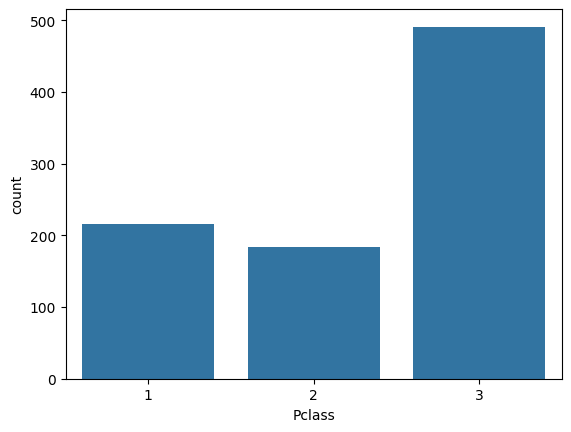

In [2]:
# 1. Import libraries and load dataset
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Load Titanic dataset
df = pd.read_csv('Titanic-Dataset.csv')

# 2. Understand the data
print(df.shape)
print(df.info())
print(df.describe())

# 3. Fill missing Age values using SimpleImputer (mean strategy)
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])

# 4. Fill missing Cabin with "Unknown"
df['Cabin'] = df['Cabin'].fillna('Unknown')

# 5. Fill missing Embarked with mode
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

# 6. Analyse passenger Class feature using countplot
sns.countplot(x='Pclass', data=df)

# 7. List names of passengers who are female and survived
female_survived = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]['Name']
print(female_survived.tolist())

# 8. Find all passengers who are in 3rd class and under age 18
third_class_under_18 = df[(df['Pclass'] == 3) & (df['Age'] < 18)]
print(third_class_under_18)

# 9. Find list of passengers who are in class 1 and older than 40
first_class_above_40 = df[(df['Pclass'] == 1) & (df['Age'] > 40)]
print(first_class_above_40)

# 10. Find list of passengers survived in above category
survived_first_class_above_40 = first_class_above_40[first_class_above_40['Survived'] == 1]
print(survived_first_class_above_40)

# 11. Male passengers who paid fare greater than 100
male_high_fare = df[(df['Sex'] == 'male') & (df['Fare'] > 100)]
print(male_high_fare)

# 12. Passengers embarked from port 'C' and in Class 2
embarked_c_class2 = df[(df['Embarked'] == 'C') & (df['Pclass'] == 2)]
print(embarked_c_class2)

# 13. Passengers with more than 2 siblings/spouses aboard (SibSp > 2)
sibsp_gt_2 = df[df['SibSp'] > 2]
print(sibsp_gt_2)

# 14. Passengers who did not survive and had no family aboard (SibSp=0 and Parch=0)
no_family_not_survived = df[(df['Survived'] == 0) & (df['SibSp'] == 0) & (df['Parch'] == 0)]
print(no_family_not_survived)

# 15. Top 5 oldest passengers who survived
oldest_survived = df[df['Survived'] == 1].sort_values(by='Age', ascending=False).head(5)
print(oldest_survived)

# 16. Passengers who paid zero fare (Fare = 0)
zero_fare_passengers = df[df['Fare'] == 0]
print(zero_fare_passengers)

# 17. Split dataset into training and testing sets (example: 80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)


# New Section